In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
from influxdb import DataFrameClient

In [2]:
plt.rcParams['figure.figsize'] = [20, 15]

In [37]:
host = 'localhost'
port = 8086
user = 'root'
password = 'root'
dbname = 'VirtualBuilding'
client = DataFrameClient(host, port, user, password, dbname)

In [38]:
tmp=client.query('select * from Temperature')
print(tmp)
tmp['Temperature']

defaultdict(<class 'list'>, {'Temperature':                           location      node      value
2018-12-31 23:30:00+00:00   Athens     T_out   8.700000
2018-12-31 23:30:00+00:00   Athens  avg_T_in  17.910401
2019-01-01 00:00:00+00:00   Athens     T_out   9.500000
2019-01-01 00:00:00+00:00   Athens  avg_T_in  17.855106
2019-01-01 00:30:00+00:00   Athens     T_out   9.350000
...                            ...       ...        ...
2019-12-31 22:00:00+00:00   Athens  avg_T_in  18.272747
2019-12-31 22:30:00+00:00   Athens     T_out  10.050000
2019-12-31 22:30:00+00:00   Athens  avg_T_in  18.267332
2019-12-31 22:59:59+00:00   Athens     T_out   9.800000
2019-12-31 22:59:59+00:00   Athens  avg_T_in  18.264131

[35032 rows x 3 columns]})


,location,node,value
2018-12-31 23:30:00+00:00,Athens,T_out,8.700000
2018-12-31 23:30:00+00:00,Athens,avg_T_in,17.910401
2019-01-01 00:00:00+00:00,Athens,T_out,9.500000
2019-01-01 00:00:00+00:00,Athens,avg_T_in,17.855106
2019-01-01 00:30:00+00:00,Athens,T_out,9.350000
...,...,...,...
2019-12-31 22:00:00+00:00,Athens,avg_T_in,18.272747
2019-12-31 22:30:00+00:00,Athens,T_out,10.050000
2019-12-31 22:30:00+00:00,Athens,avg_T_in,18.267332
2019-12-31 22:59:59+00:00,Athens,T_out,9.800000


In [39]:
df = tmp['Temperature'].pivot(columns='node',values='value') 


In [40]:
df.columns
df

node,T_out,avg_T_in
2018-12-31 23:30:00+00:00,8.70,17.910401
2019-01-01 00:00:00+00:00,9.50,17.855106
2019-01-01 00:30:00+00:00,9.35,17.859839
2019-01-01 01:00:00+00:00,9.20,17.855974
2019-01-01 01:30:00+00:00,9.10,17.845435
...,...,...
2019-12-31 21:00:00+00:00,10.70,18.267243
2019-12-31 21:30:00+00:00,10.50,18.270161
2019-12-31 22:00:00+00:00,10.30,18.272747
2019-12-31 22:30:00+00:00,10.05,18.267332


In [41]:
tmp=client.query('select * from Power')
tmp['Power']

,location,node,value
2018-12-31 23:30:00+00:00,Athens,Power,0.424788
2019-01-01 00:00:00+00:00,Athens,Power,0.409543
2019-01-01 00:30:00+00:00,Athens,Power,0.409999
2019-01-01 01:00:00+00:00,Athens,Power,0.410078
2019-01-01 01:30:00+00:00,Athens,Power,0.409332
...,...,...,...
2019-12-31 21:00:00+00:00,Athens,Power,0.449828
2019-12-31 21:30:00+00:00,Athens,Power,0.377817
2019-12-31 22:00:00+00:00,Athens,Power,0.380604
2019-12-31 22:30:00+00:00,Athens,Power,0.351240


In [ ]:
tmp=client.query('select * from Power')
tmp['Power']

In [42]:
df['Power']=tmp['Power'].value[:len(df)]
df.head()

node,T_out,avg_T_in,Power
2018-12-31 23:30:00+00:00,8.70,17.910401,0.424788
2019-01-01 00:00:00+00:00,9.50,17.855106,0.409543
2019-01-01 00:30:00+00:00,9.35,17.859839,0.409999
2019-01-01 01:00:00+00:00,9.20,17.855974,0.410078
2019-01-01 01:30:00+00:00,9.10,17.845435,0.409332


In [ ]:
df['Power']=tmp['Power'].value[:len(df)]
df.head()

In [43]:
df['deltaT']=df.avg_T_in-df.T_out
df.head()

node,T_out,avg_T_in,Power,deltaT
2018-12-31 23:30:00+00:00,8.70,17.910401,0.424788,9.210401
2019-01-01 00:00:00+00:00,9.50,17.855106,0.409543,8.355106
2019-01-01 00:30:00+00:00,9.35,17.859839,0.409999,8.509839
2019-01-01 01:00:00+00:00,9.20,17.855974,0.410078,8.655974
2019-01-01 01:30:00+00:00,9.10,17.845435,0.409332,8.745435


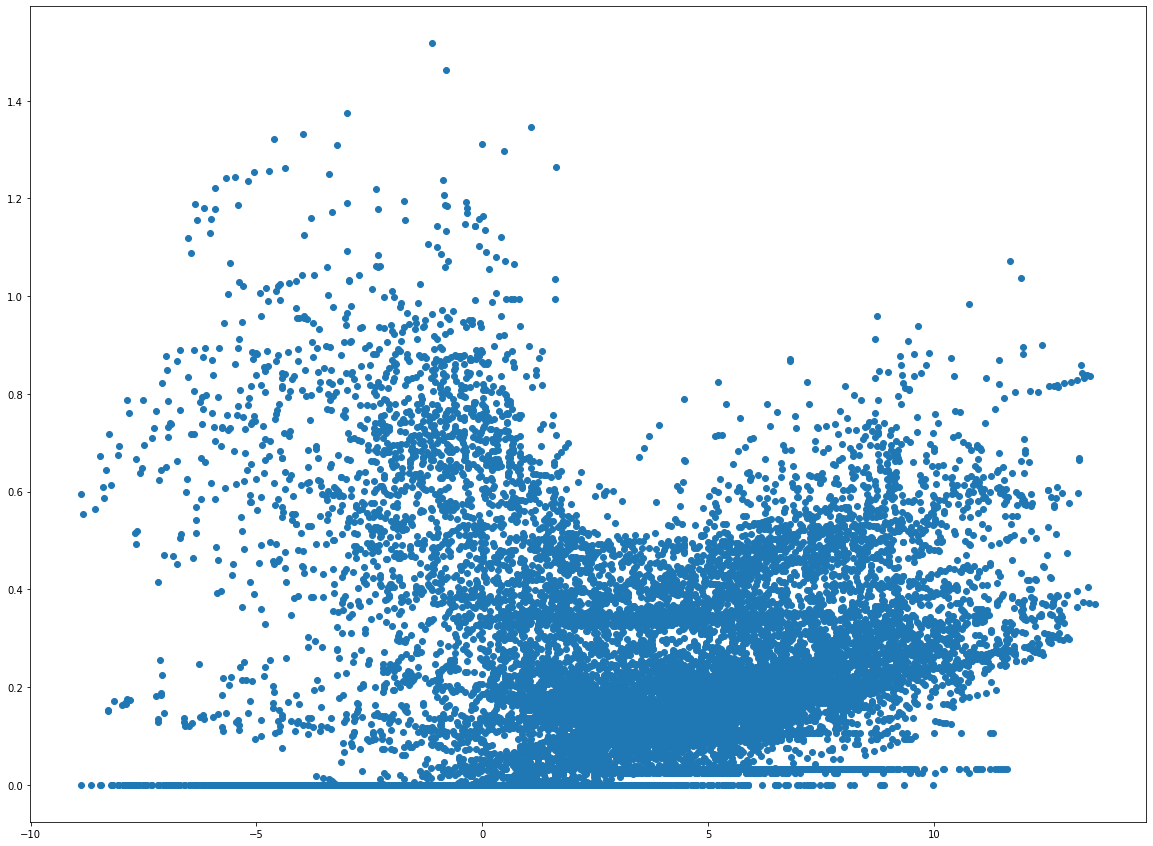

In [44]:
plt.scatter(df.deltaT,df.Power)

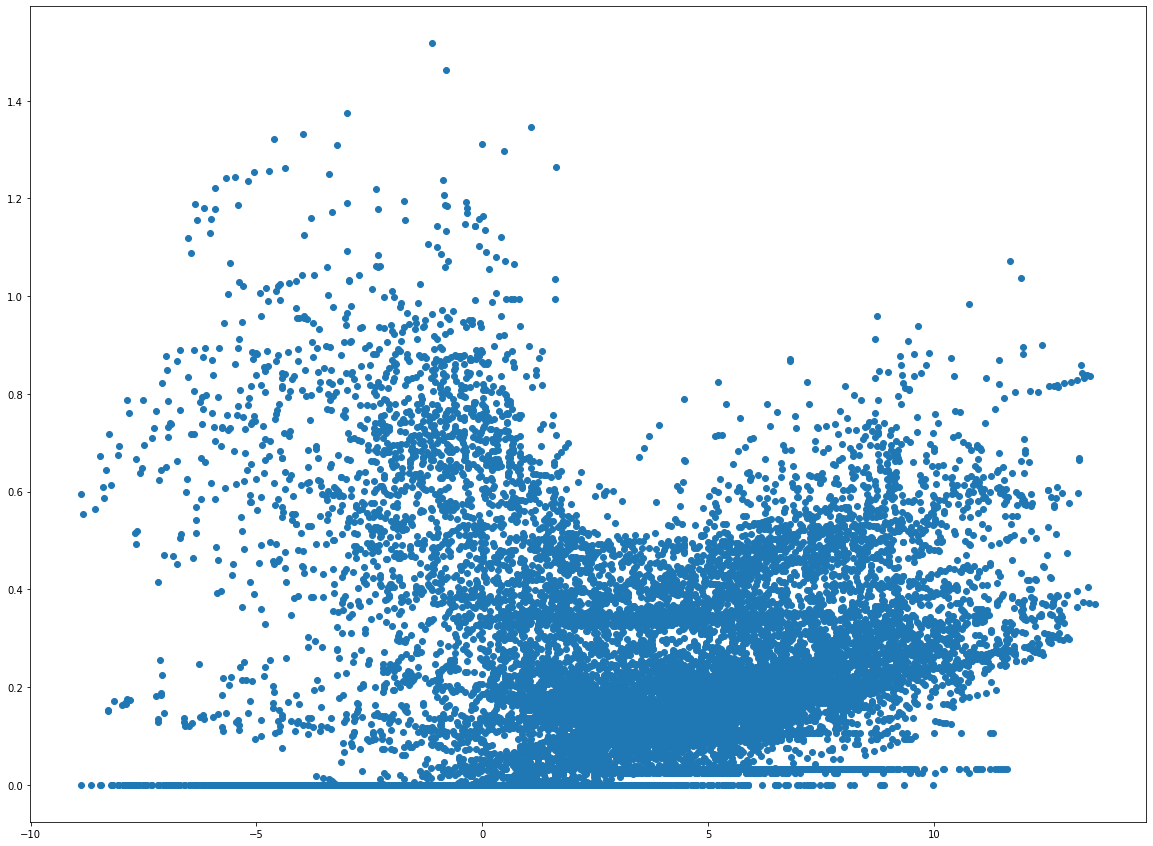

In [45]:
plt.scatter(df.deltaT,df.Power)

In [46]:
model = sm.OLS(df.Power,sm.add_constant(df.deltaT))
#model = sm.OLS(df.Power,sm.add_constant(df.deltaT)) #for cooling
#model = sm.OLS(df.Power,sm.add_constant(df.deltaT)) #for heatig

In [47]:
results=model.fit()
#results for heat
# for cooling

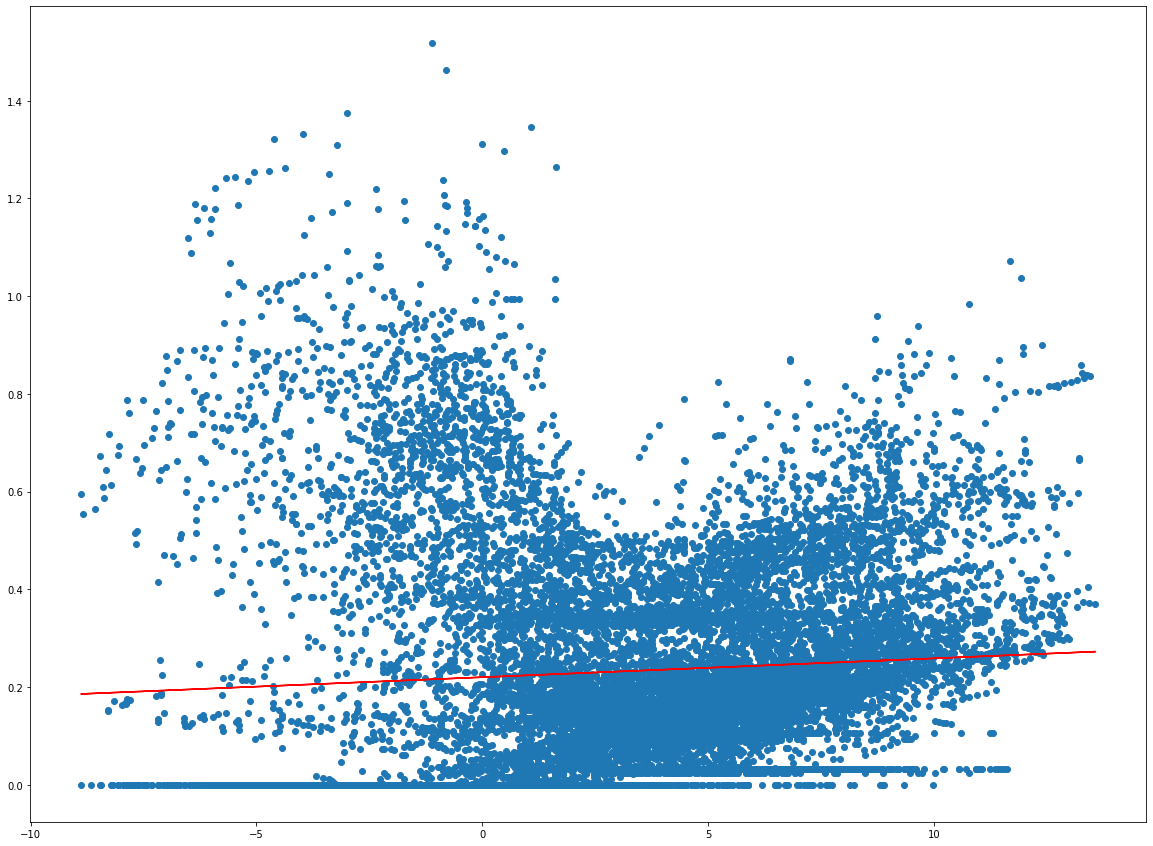

In [48]:
plt.plot(df.deltaT,results.predict(),'r')
plt.scatter(df.deltaT,df.Power)

In [49]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Power   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     83.41
Date:                Tue, 05 Jan 2021   Prob (F-statistic):           7.37e-20
Time:                        13:35:55   Log-Likelihood:                 1824.9
No. Observations:               17516   AIC:                            -3646.
Df Residuals:                   17514   BIC:                            -3630.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2201      0.002     99.984      0.000       0.216       0.224
deltaT         0.0039      0.000      9.133      0.000       0.003       0.005
==============================================================================
Omnibus:                     4077.256   Durbin-Watson:                   0.167
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8604.295
Skew:                           1.366   Prob(JB):                         0.00
Kurtosis:                       5.079   Cond. No.                         7.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
df=df.resample('H').mean()
df=df.dropna()

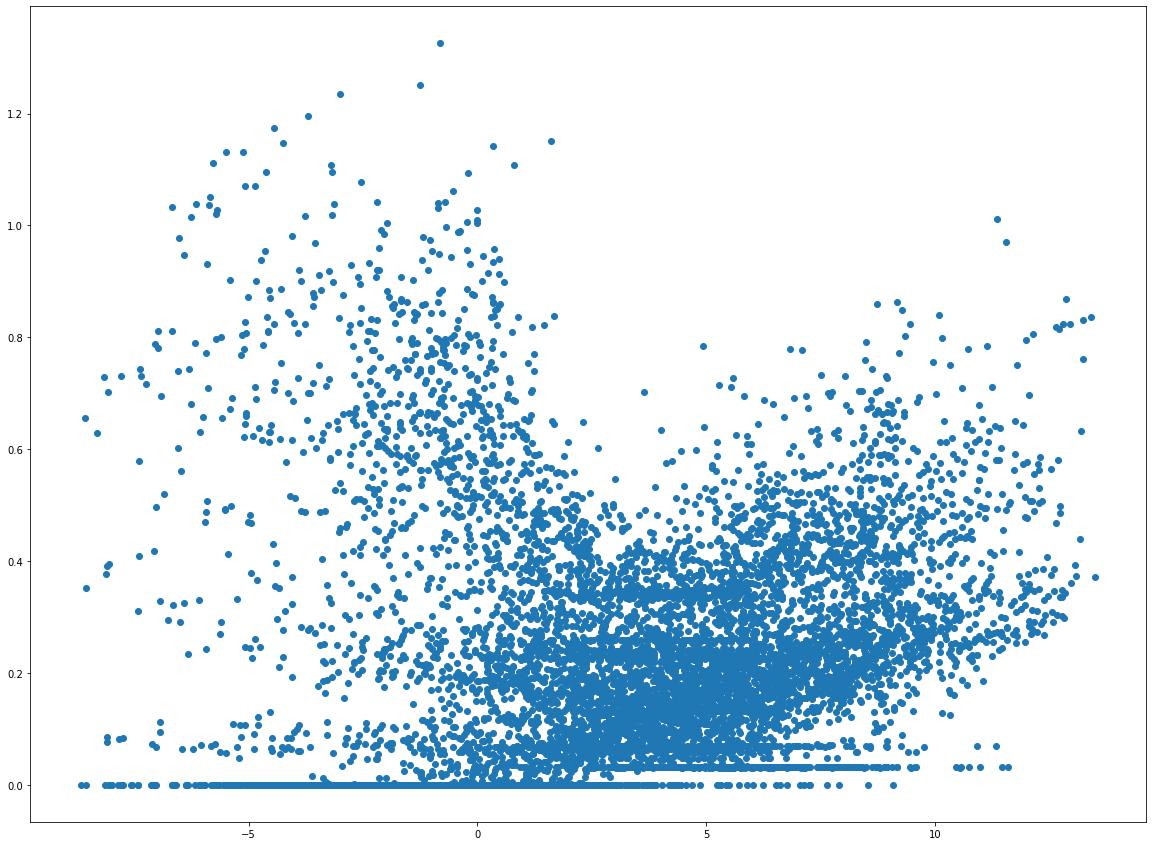

In [51]:
plt.scatter(df.deltaT,df.Power)

In [52]:
model = sm.OLS(df.Power,sm.add_constant(df.deltaT))

In [53]:
results=model.fit()

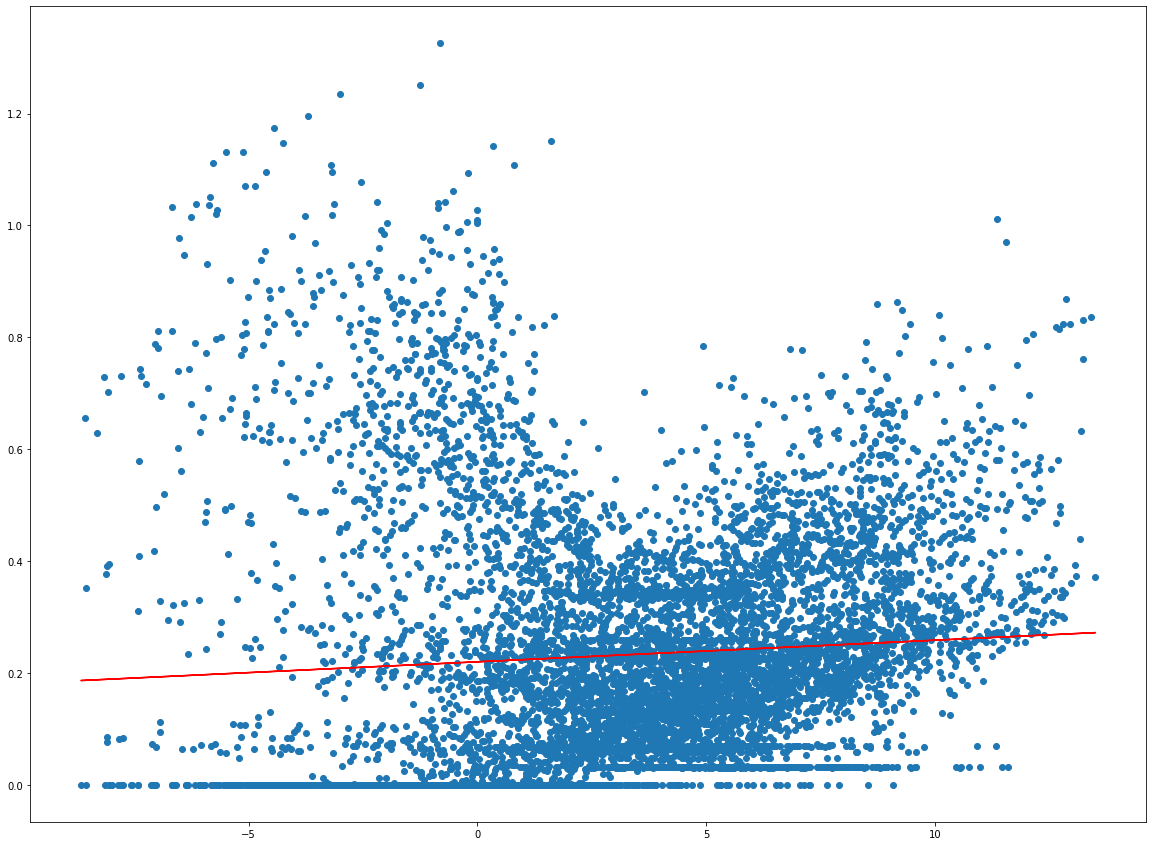

In [54]:
plt.plot(df.deltaT,results.predict(),'r')
plt.scatter(df.deltaT,df.Power)

In [55]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Power   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     45.35
Date:                Tue, 05 Jan 2021   Prob (F-statistic):           1.75e-11
Time:                        13:36:04   Log-Likelihood:                 1278.2
No. Observations:                8758   AIC:                            -2552.
Df Residuals:                    8756   BIC:                            -2538.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2198      0.003     73.482      0.000       0.214       0.226
deltaT         0.0039      0.001      6.734      0.000       0.003       0.005
==============================================================================
Omnibus:                     1958.850   Durbin-Watson:                   0.261
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3973.054
Skew:                           1.333   Prob(JB):                         0.00
Kurtosis:                       4.945   Cond. No.                         7.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
df=df.resample('D').mean()
df=df.dropna()

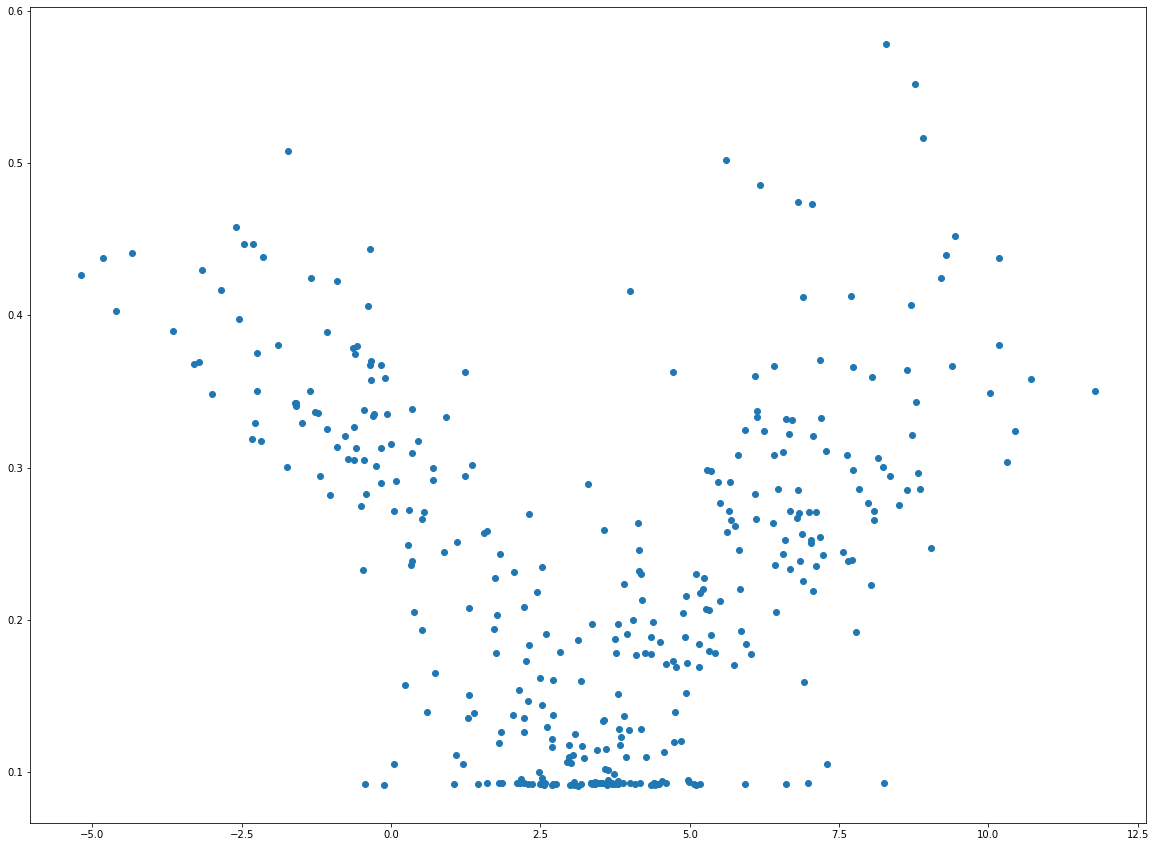

In [57]:
plt.scatter(df.deltaT,df.Power)

In [58]:
model = sm.OLS(df.Power,sm.add_constant(df.deltaT))

In [59]:
results=model.fit()

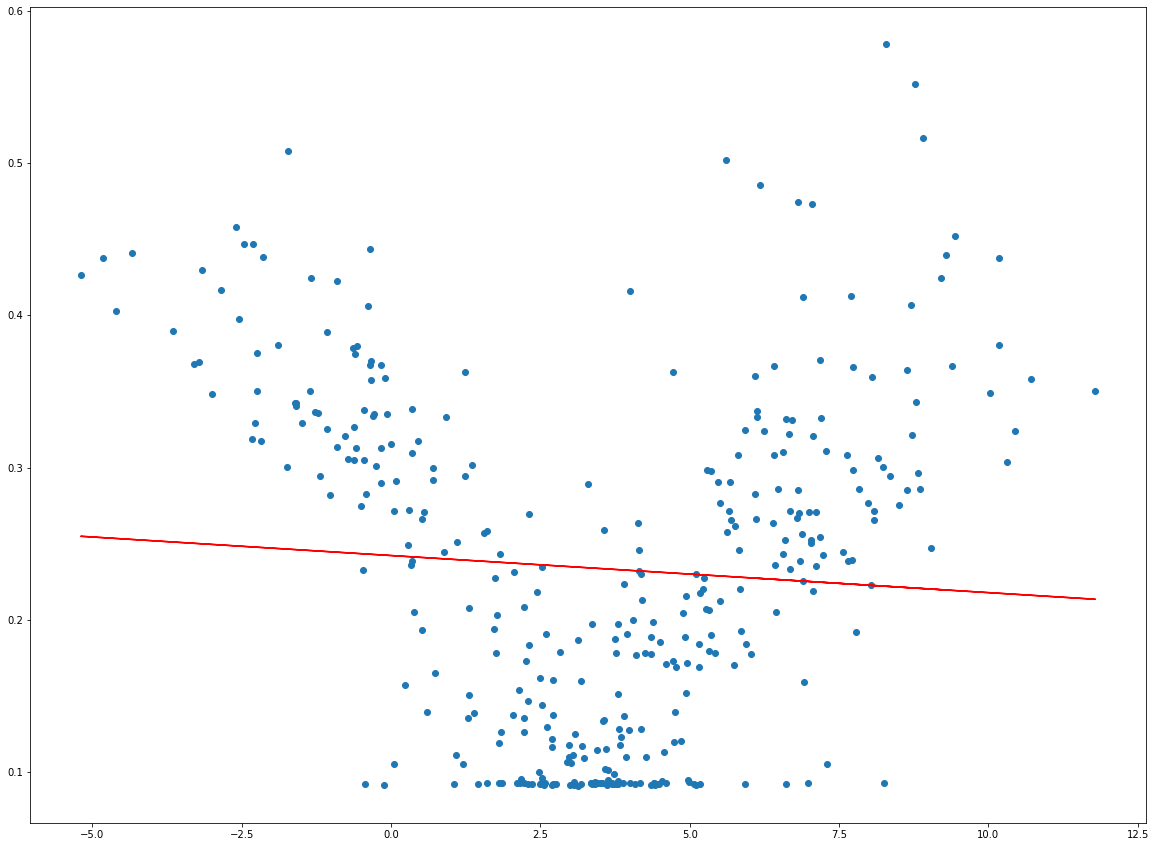

In [60]:
plt.plot(df.deltaT,results.predict(),'r')
plt.scatter(df.deltaT,df.Power)

In [61]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Power   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.840
Date:                Tue, 05 Jan 2021   Prob (F-statistic):              0.176
Time:                        13:36:15   Log-Likelihood:                 282.22
No. Observations:                 366   AIC:                            -560.4
Df Residuals:                     364   BIC:                            -552.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2422      0.009     28.228      0.000       0.225       0.259
deltaT        -0.0024      0.002     -1.357      0.176      -0.006       0.001
==============================================================================
Omnibus:                       19.376   Durbin-Watson:                   0.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.496
Skew:                           0.384   Prob(JB):                     0.000712
Kurtosis:                       2.398   Cond. No.                         7.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
df=df.resample('W').mean()
df=df.dropna()

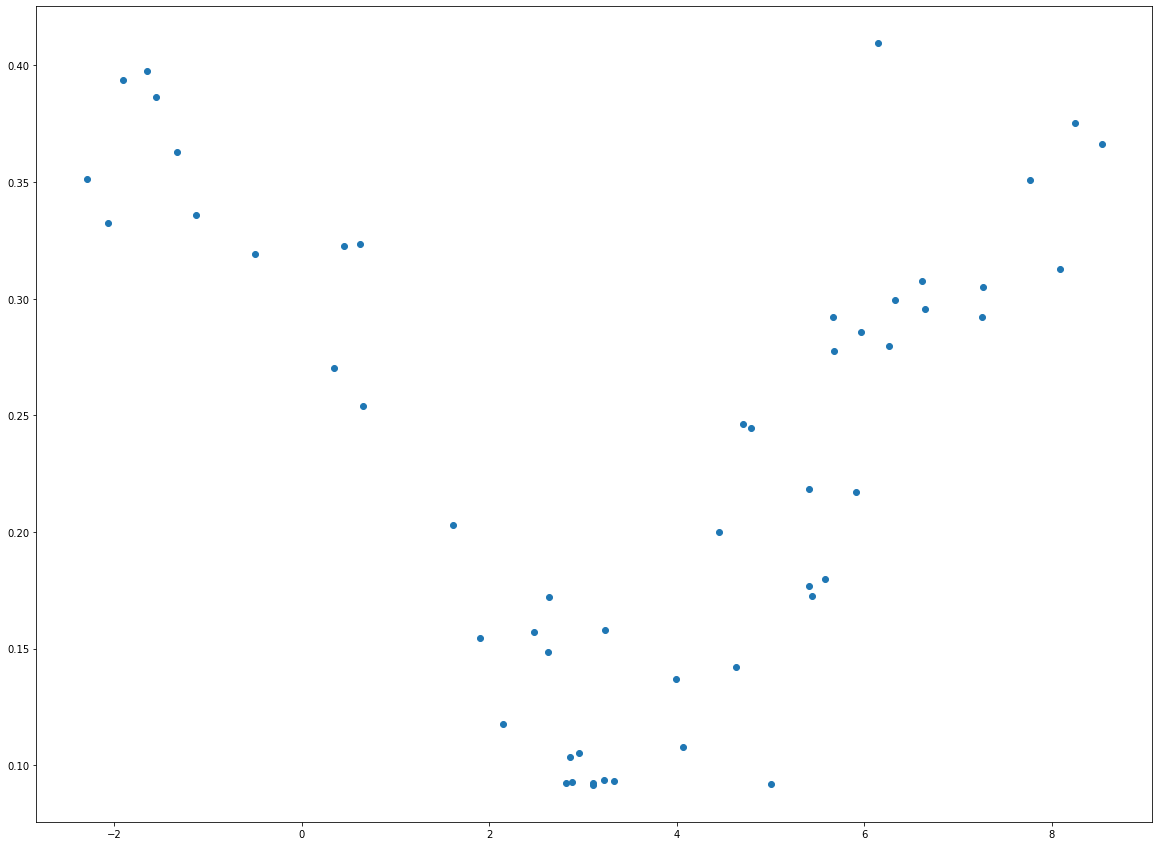

In [63]:
plt.scatter(df.deltaT,df.Power)


In [64]:
model = sm.OLS(df.Power,sm.add_constant(df.deltaT))

In [65]:
results=model.fit()

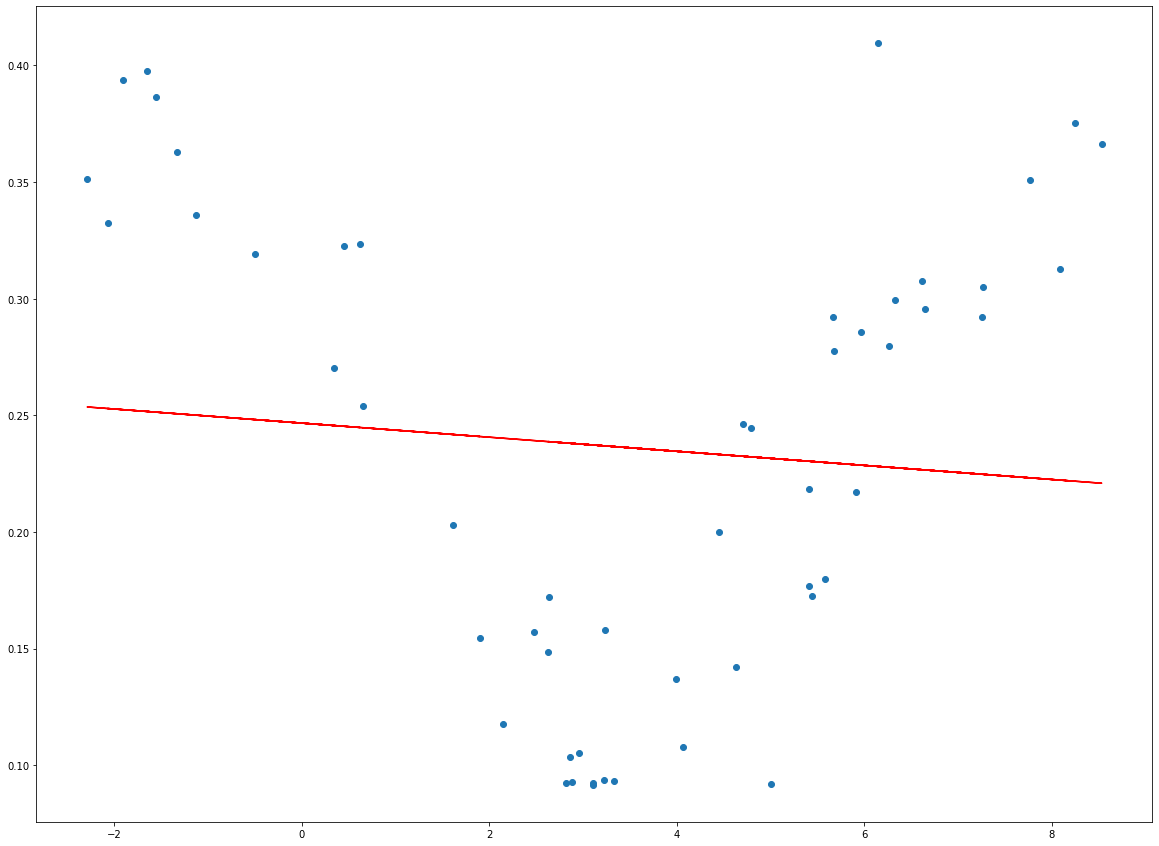

In [66]:
plt.plot(df.deltaT,results.predict(),'r')
plt.scatter(df.deltaT,df.Power)

In [67]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Power   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.4023
Date:                Tue, 05 Jan 2021   Prob (F-statistic):              0.529
Time:                        13:36:24   Log-Likelihood:                 46.870
No. Observations:                  53   AIC:                            -89.74
Df Residuals:                      51   BIC:                            -85.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2467      0.022     11.298      0.000       0.203       0.291
deltaT        -0.0030      0.005     -0.634      0.529      -0.013       0.007
==============================================================================
Omnibus:                       22.748   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.988
Skew:                          -0.057   Prob(JB):                        0.136
Kurtosis:                       1.661   Cond. No.                         7.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""